<h1><center> Aula 11 - Floresta Aleatória</center></h1>

Na aula de prática de hoje iremos aprender a usar o método de aprendizagem de máquina chamado Floresta Aleatória (<i>Random Forest</i>). Floresta aleatórias é um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão, que serão abordadas a seguir. 
<br><br>
Iremos utilizar novamente a <i>dataset</i> do <a href="https://drive.google.com/open?id=1bvQeIl0EUDW_UVTARilsTW3PLDuuhlxl"><b>Titanic</b></a> (em português) (<a href = "https://www.kaggle.com/c/titanic/data">dataset original - Kaggle</a>) . Primeiramente iremos fazer as devidas transformações nos dados, como seleção de <i>features</i>, remoção de valores nulos, e <i>"dummização"</i>. Depois, iremos separar o <i>dataset</i> em treino e teste. Em seguida, iremos os conceitos de Grid Search e Cross-validation para selecionar os melhores parametros para criar nossa floresta. Por fim, apresentaremos os resultados do nosso modelo e salvaremos o mesmo em um arquivo, para que possamos carregado-lo e utilizar a predição novamente, sem precisarmos criar o modelo do zero novamente.
<br><br>
Documentação <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a>

<h1><b>LET'S CODE!!</b></h1>

In [77]:
# BIBLIOTECAS DATA SCIENCE
import pandas as pd
import numpy as np

# BIBLIOTECAS DE PLOT
import matplotlib.pyplot as plt 

In [78]:
# FUNÇÕES UTEIS
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # DEIXAR QUADRADO
    plt.ylim(len(cm)-0.5, -0.5)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# MOSTRA RESULTADOS
def mostra_resultados(y, y_pred, classes, normalize=False,
                      title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos
    TP = np.diag(cm)                   # Verdadeiro Positivo
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos
    TPR = TP / (TP + FN)  # Revocação    
    PPV = TP / (TP + FP)  # Precisao
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia

    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    
    print("    F1 Score:{}".format(F1))
    print("    Acuracia:{}".format(ACC))
    
    plot_confusion_matrix(cm, classes)    

In [79]:
# CARREGA BASE DO TITANIC
df = pd.read_csv("Aula 11/titanic_ptbr.csv", sep=";", encoding="utf8")

**CAMPOS (FEATURES)**
* **id_passageiro** = ID do passageiro do navio (código primário).
* **sobreviveu** = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero não sobreviveu.
* **tipo_classe** = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* **nome** = Nome do passageiro
* **sexo** = Gênero do passageiro, sendo masculino e feminino.
* **idade** = Idade do passageiro na data da ocorrência do naufrágio.
* **n_irmaos_abordo** = Número de irmãos / cônjuges a bordo.
* **n_pais_filhos_abordo** = Número de pais / filhos a bordo.
* **ticket** = Código do ticket.
* **preco** = Valor da passagem.
* **cabine** = Código de identificação da Cabine.
* **local_embarque** = Local onde o passageiro embarcou no navio.

In [80]:
df.head()

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque
0,1,não,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,não,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df['sobreviveu_mod'] = df['sobreviveu'].apply(lambda x: 1 if x == 'sim' else 0)

In [82]:
df[['sobreviveu_mod', 'sobreviveu']]

,sobreviveu_mod,sobreviveu
0,0,não
1,1,sim
2,1,sim
3,1,sim
4,0,não
...,...,...
1304,0,não
1305,1,sim
1306,0,não
1307,0,não


In [83]:
df['sobreviveu'] = df['sobreviveu_mod']

In [84]:
df.head()

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque,sobreviveu_mod
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S,0


In [85]:
df.shape

(1309, 13)

In [86]:
selecao_features = ['sobreviveu', 'tipo_classe', 'sexo', 'idade', 'n_irmaos_abordo', 'n_pais_filhos_abordo', 'preco', 'local_embarque']

df = df[selecao_features]
df.head()

,sobreviveu,tipo_classe,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,local_embarque
0,0,3,homem,22.0,1,0,7.2500,S
1,1,1,mulher,38.0,1,0,71.2833,C
2,1,3,mulher,26.0,0,0,7.9250,S
3,1,1,mulher,35.0,1,0,53.1000,S
4,0,3,homem,35.0,0,0,8.0500,S


In [87]:
round(df.isnull().mean() * 100, 2)

sobreviveu               0.00
tipo_classe              0.00
sexo                     0.00
idade                   20.09
n_irmaos_abordo          0.00
n_pais_filhos_abordo     0.00
preco                    0.08
local_embarque           0.15
dtype: float64

In [88]:
df = df.dropna()
df.shape

(1043, 8)

In [89]:
colunas_categoricas = ['sexo', 'local_embarque']

dummy = pd.get_dummies(df, columns=colunas_categoricas)

In [90]:
dummy

,sobreviveu,tipo_classe,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,sexo_homem,sexo_mulher,local_embarque_C,local_embarque_Q,local_embarque_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1300,1,3,3.0,1,1,13.7750,0,1,0,0,1
1302,1,1,37.0,1,0,90.0000,0,1,0,1,0
1303,1,3,28.0,0,0,7.7750,0,1,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,1,0,0


In [91]:
dummy['sobreviveu'].value_counts()

0    628
1    415
Name: sobreviveu, dtype: int64

In [92]:
dummy['sobreviveu'].value_counts(normalize=True)

0    0.602109
1    0.397891
Name: sobreviveu, dtype: float64

In [93]:
y = dummy['sobreviveu'] # Variável resposta
X = dummy.drop(columns='sobreviveu') # Variável treino

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [95]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

/home/pedro/anaconda3/envs/pos-ds-ia-37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred = modelo.predict(X_test)

In [97]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Verdadeiros Positivos:[189  93]
    Verdadeiros Negativos:[ 93 189]
    Falso Positivo:[29 34]
    Falso Negativo:[34 29]
    Revocação:[0.84753363 0.76229508]
    Precisao:[0.86697248 0.73228346]
    F1 Score:[0.85714286 0.74698795]
    Acuracia:[0.8173913 0.8173913]
Confusion matrix, without normalization


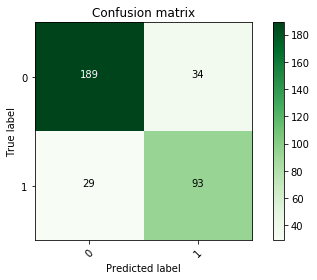

In [98]:
mostra_resultados(y_test, y_pred, modelo.classes_)

In [100]:
import pickle

filename = 'modelo_rf_cl.pkl'
pickle.dump(modelo, open(filename, 'wb'))

In [103]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<b> BALANCEAMENTO </b>

Em alguns casos, para melhorar o desempenho do modelo, será necessário realizar um balanceamento dos possíveis valores da <i>feature</i> resposta (<i>target</i>). Não é o caso do <i>dataset</i> do <b>Titanic</b>, mas iremos comparar os resultados dos modelos com balanceamento e sem posteriormente.

Para isso, iremos utilizar a função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html"><b>resample</b></a>, do <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils">sklearn.utils</a>.